In [1]:
!pip install tabgan be_great table_evaluator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (4

In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from tabgan.sampler import GANGenerator

In [3]:
df = pd.read_csv("data.csv")
df

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s16,s17,s18,s19,s20,s21,RUL,label1,label2,cycle_norm
0,1,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.0,0.333333,0.0,0.0,0.713178,0.724662,191,0,0,0.000000
1,1,2,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.0,0.333333,0.0,0.0,0.666667,0.731014,190,0,0,0.002770
2,1,3,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.0,0.166667,0.0,0.0,0.627907,0.621375,189,0,0,0.005540
3,1,4,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.0,0.333333,0.0,0.0,0.573643,0.662386,188,0,0,0.008310
4,1,5,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.0,0.416667,0.0,0.0,0.589147,0.704502,187,0,0,0.011080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,0.477011,0.250000,0.0,0.0,0.686747,0.587312,0.782917,0.0,...,0.0,0.750000,0.0,0.0,0.271318,0.109500,4,1,2,0.540166
20627,100,197,0.408046,0.083333,0.0,0.0,0.701807,0.729453,0.866475,0.0,...,0.0,0.583333,0.0,0.0,0.124031,0.366197,3,1,2,0.542936
20628,100,198,0.522989,0.500000,0.0,0.0,0.665663,0.684979,0.775321,0.0,...,0.0,0.833333,0.0,0.0,0.232558,0.053991,2,1,2,0.545706
20629,100,199,0.436782,0.750000,0.0,0.0,0.608434,0.746021,0.747468,0.0,...,0.0,0.583333,0.0,0.0,0.116279,0.234466,1,1,2,0.548476


In [4]:
df.isna().sum()

id            0
cycle         0
setting1      0
setting2      0
setting3      0
s1            0
s2            0
s3            0
s4            0
s5            0
s6            0
s7            0
s8            0
s9            0
s10           0
s11           0
s12           0
s13           0
s14           0
s15           0
s16           0
s17           0
s18           0
s19           0
s20           0
s21           0
RUL           0
label1        0
label2        0
cycle_norm    0
dtype: int64

In [5]:
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(
    df.drop("RUL", axis=1),
    df["RUL"],
    test_size=0.20,
    random_state=42
)

In [6]:
df_x_train = pd.DataFrame(df_x_train, columns=df_x_train.columns)
df_y_train = pd.DataFrame(df_y_train, columns=["RUL"])
df_x_test = pd.DataFrame(df_x_test, columns=df_x_test.columns)
df_y_test = pd.DataFrame(df_y_test, columns=["RUL"])

In [7]:
gen_x, gen_y = GANGenerator(gen_x_times=1.1, cat_cols=None,
           bot_filter_quantile=0.001, top_filter_quantile=0.999,
           is_post_process=True,
           adversarial_model_params={
               "metrics": "rmse", "max_depth": 2, "max_bin": 100,
               "learning_rate": 0.02, "random_state": 42, "n_estimators": 500,
           }, pregeneration_frac=2, only_generated_data=False,
           gen_params={"batch_size": 500, "patience": 25, "epochs": 500}
          ).generate_data_pipe(df_x_train, df_y_train, df_x_test, deep_copy=True, only_adversarial=False, use_adversarial=True)

Fitting CTGAN transformers for each column:   0%|          | 0/30 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 3302, number of negative: 3301
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000956 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1599
[LightGBM] [Info] Number of data points in the train set: 6603, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500076 -> initscore=0.000303
[LightGBM] [Info] Start training from score 0.000303
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [8]:
gen_x

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s15,s16,s17,s18,s19,s20,s21,label1,label2,cycle_norm
0,2,280,0.149425,0.500000,0.0,0.0,0.728916,0.505123,0.686023,0.0,...,0.631012,0.0,0.666667,0.0,0.0,0.325581,0.347970,1,2,0.772853
1,6,156,0.270115,0.250000,0.0,0.0,0.674699,0.530194,0.591830,0.0,...,0.579069,0.0,0.666667,0.0,0.0,0.317829,0.325463,0,0,0.429363
2,1,173,0.316092,0.666667,0.0,0.0,0.530120,0.428385,0.726199,0.0,...,0.708734,0.0,0.583333,0.0,0.0,0.348837,0.393123,1,1,0.476454
3,8,109,0.172414,0.583333,0.0,0.0,0.509036,0.559407,0.503883,0.0,...,0.641016,0.0,0.500000,0.0,0.0,0.550388,0.531483,0,0,0.299169
4,2,252,0.270115,0.833333,0.0,0.0,0.487952,0.563549,0.682647,0.0,...,0.588688,0.0,0.500000,0.0,0.0,0.279070,0.426816,0,0,0.695291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15977,73,212,0.419540,0.166667,0.0,0.0,0.683735,0.583824,0.816847,0.0,...,0.752597,0.0,0.666667,0.0,0.0,0.364341,0.163076,1,2,0.584488
15978,61,182,0.603448,0.750000,0.0,0.0,0.858434,0.768694,0.809251,0.0,...,0.783763,0.0,0.666667,0.0,0.0,0.356589,0.125794,1,2,0.501385
15979,24,147,0.465517,0.833333,0.0,0.0,0.777108,0.660344,0.820729,0.0,...,0.817622,0.0,0.833333,0.0,0.0,0.341085,0.188760,1,2,0.404432
15980,66,201,0.436782,0.750000,0.0,0.0,0.545181,0.618269,0.795409,0.0,...,0.836860,0.0,0.583333,0.0,0.0,0.217054,0.116266,1,2,0.554017


In [9]:
print(gen_y.head())

0     7
1    32
2    19
3    41
4    35
Name: RUL, dtype: int64


In [10]:
gen_x.shape

(15982, 29)

In [11]:
print(gen_x.isna().sum())
print(gen_y.isna().sum())

id            0
cycle         0
setting1      0
setting2      0
setting3      0
s1            0
s2            0
s3            0
s4            0
s5            0
s6            0
s7            0
s8            0
s9            0
s10           0
s11           0
s12           0
s13           0
s14           0
s15           0
s16           0
s17           0
s18           0
s19           0
s20           0
s21           0
label1        0
label2        0
cycle_norm    0
dtype: int64
0


In [12]:
output_file_path = "tabgan_x.csv"
gen_x.to_csv(output_file_path, index=False)
print(f"Data saved to {output_file_path}")

Data saved to tabgan_x.csv


In [13]:
output_file_path = "tabgan_y.csv"
gen_y.to_csv(output_file_path, index=False)
print(f"Data saved to {output_file_path}")

Data saved to tabgan_y.csv


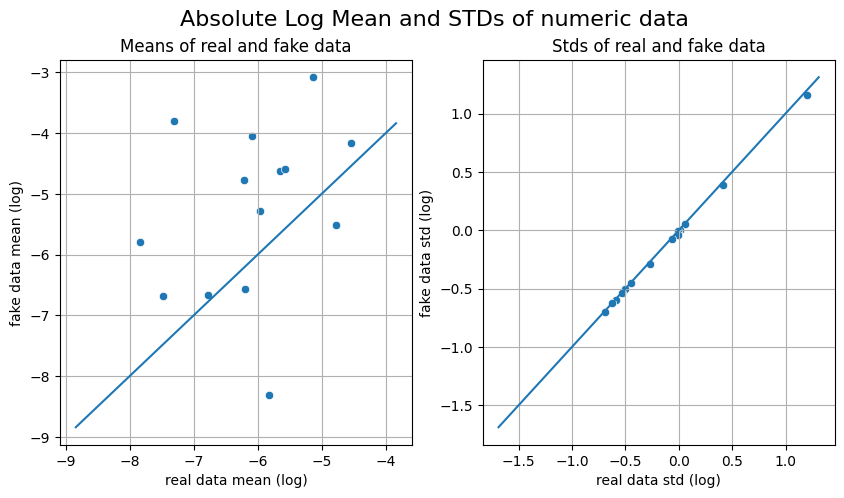

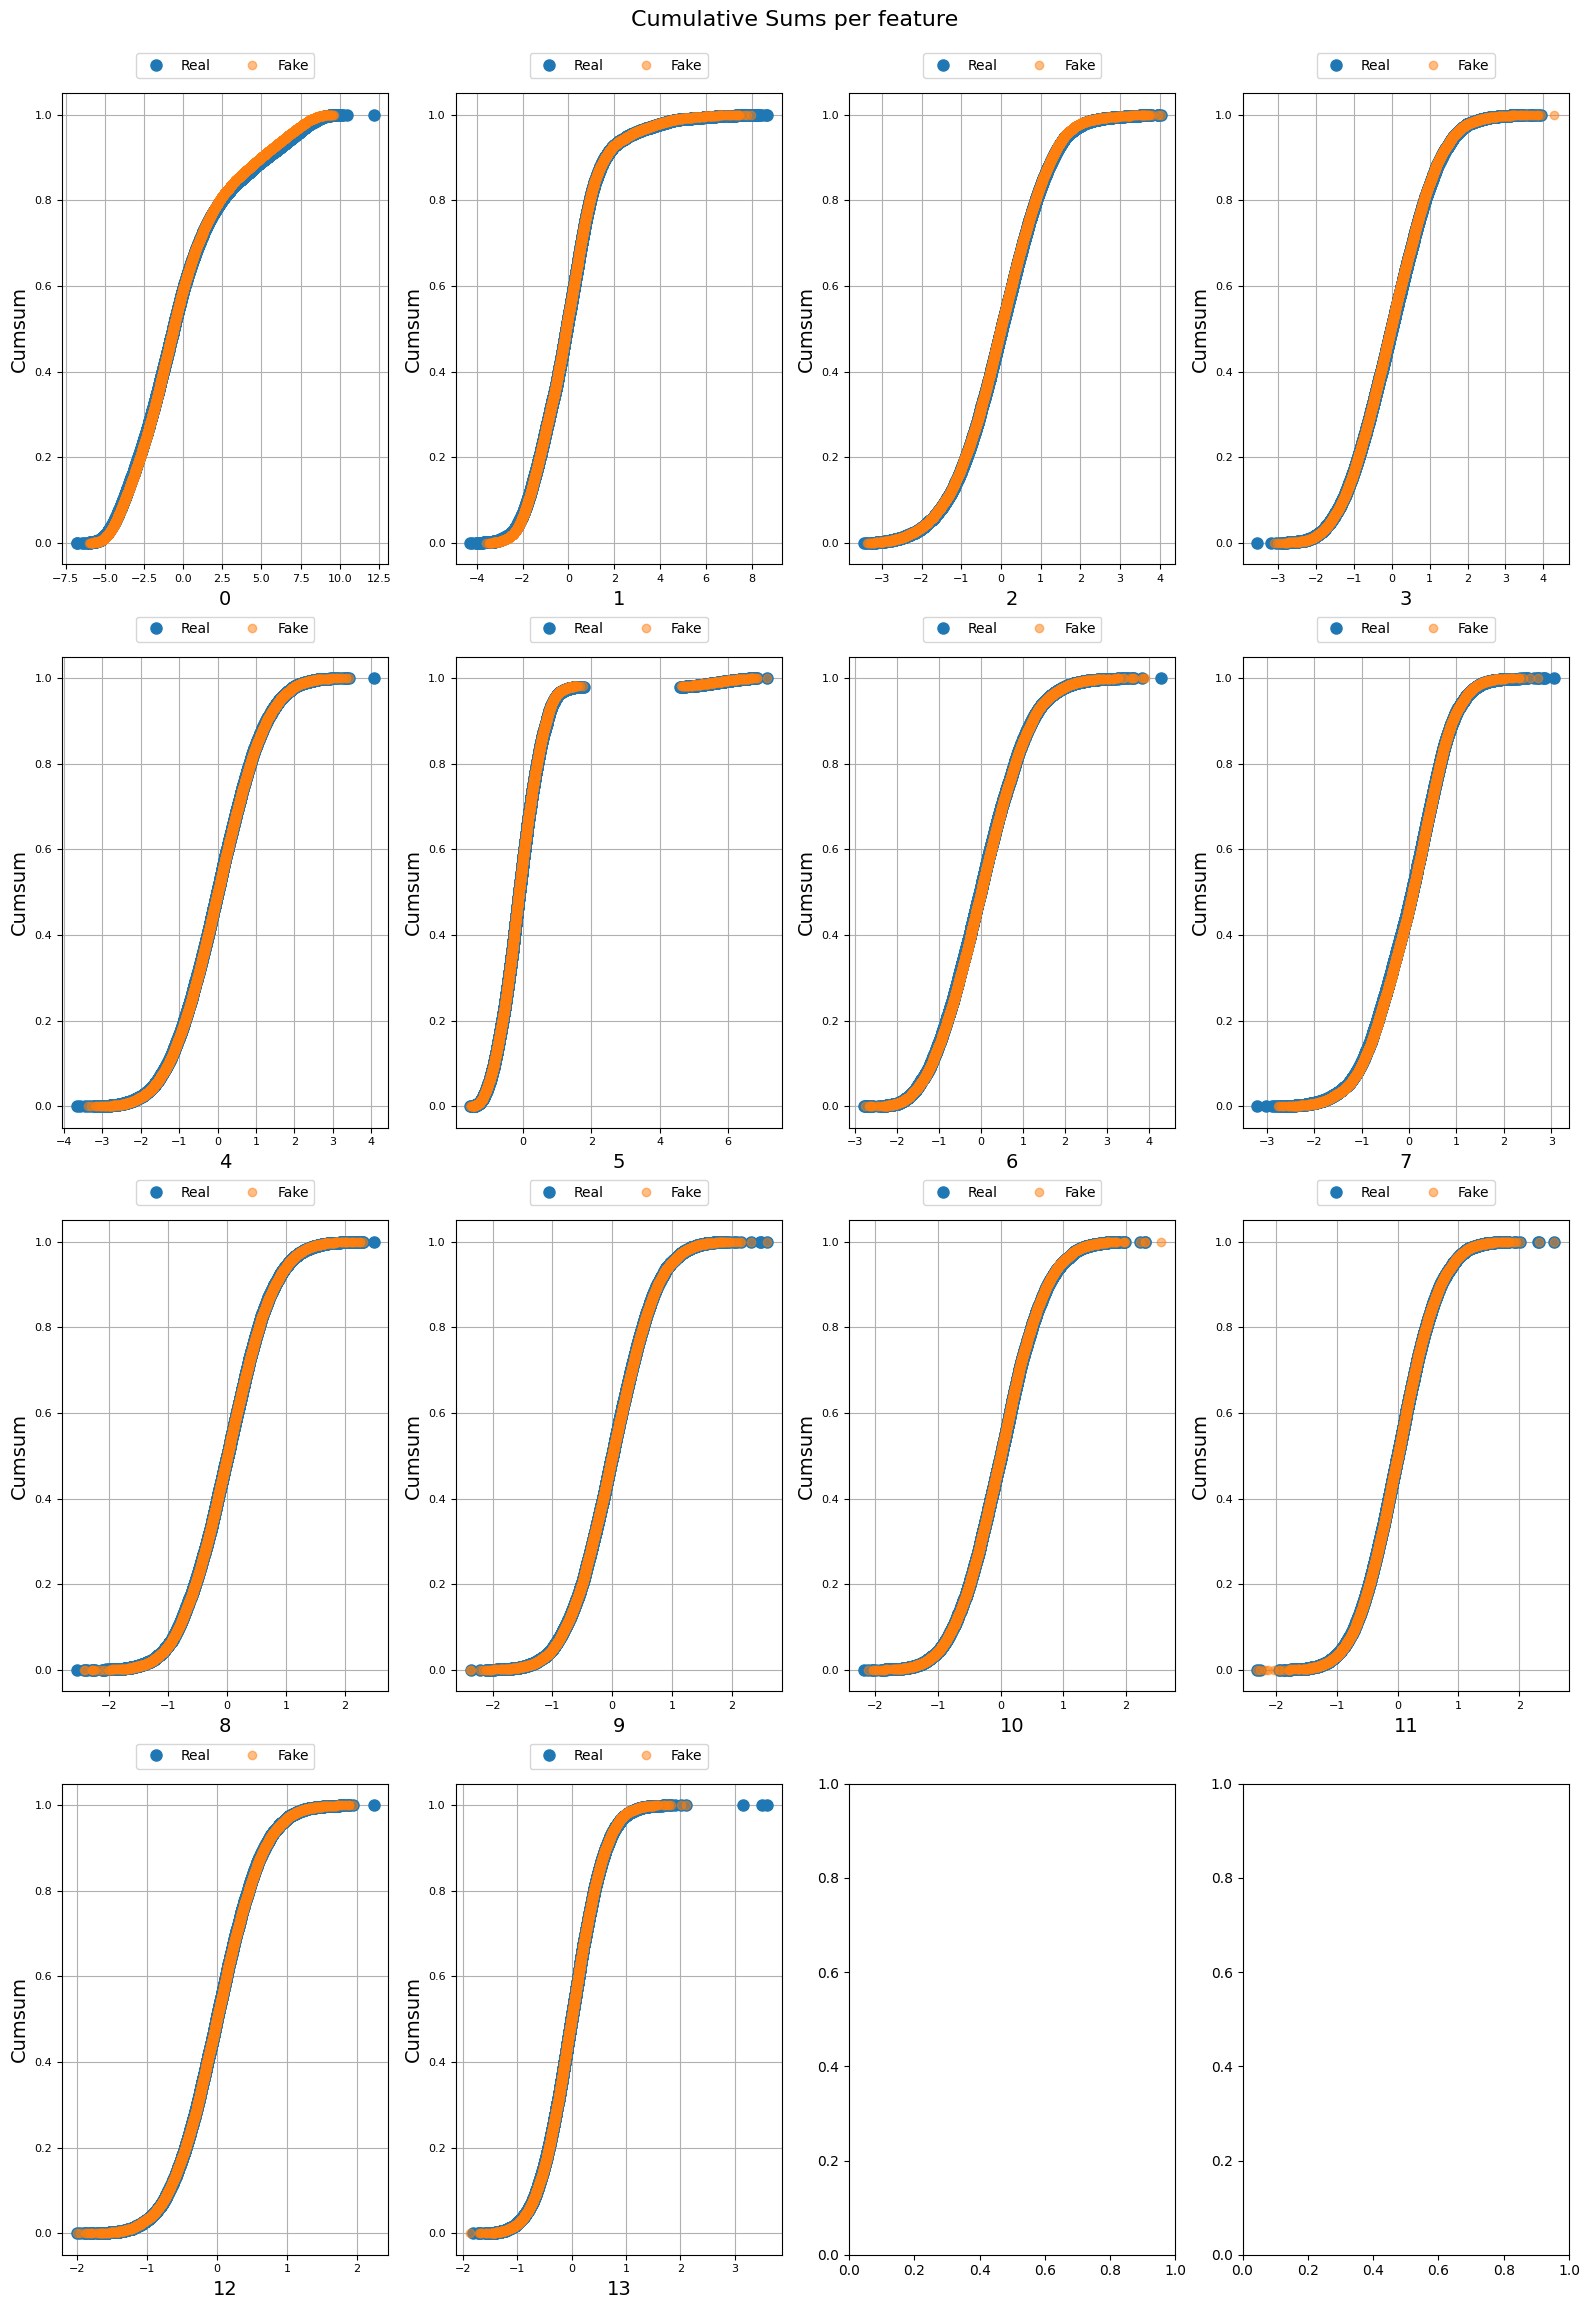

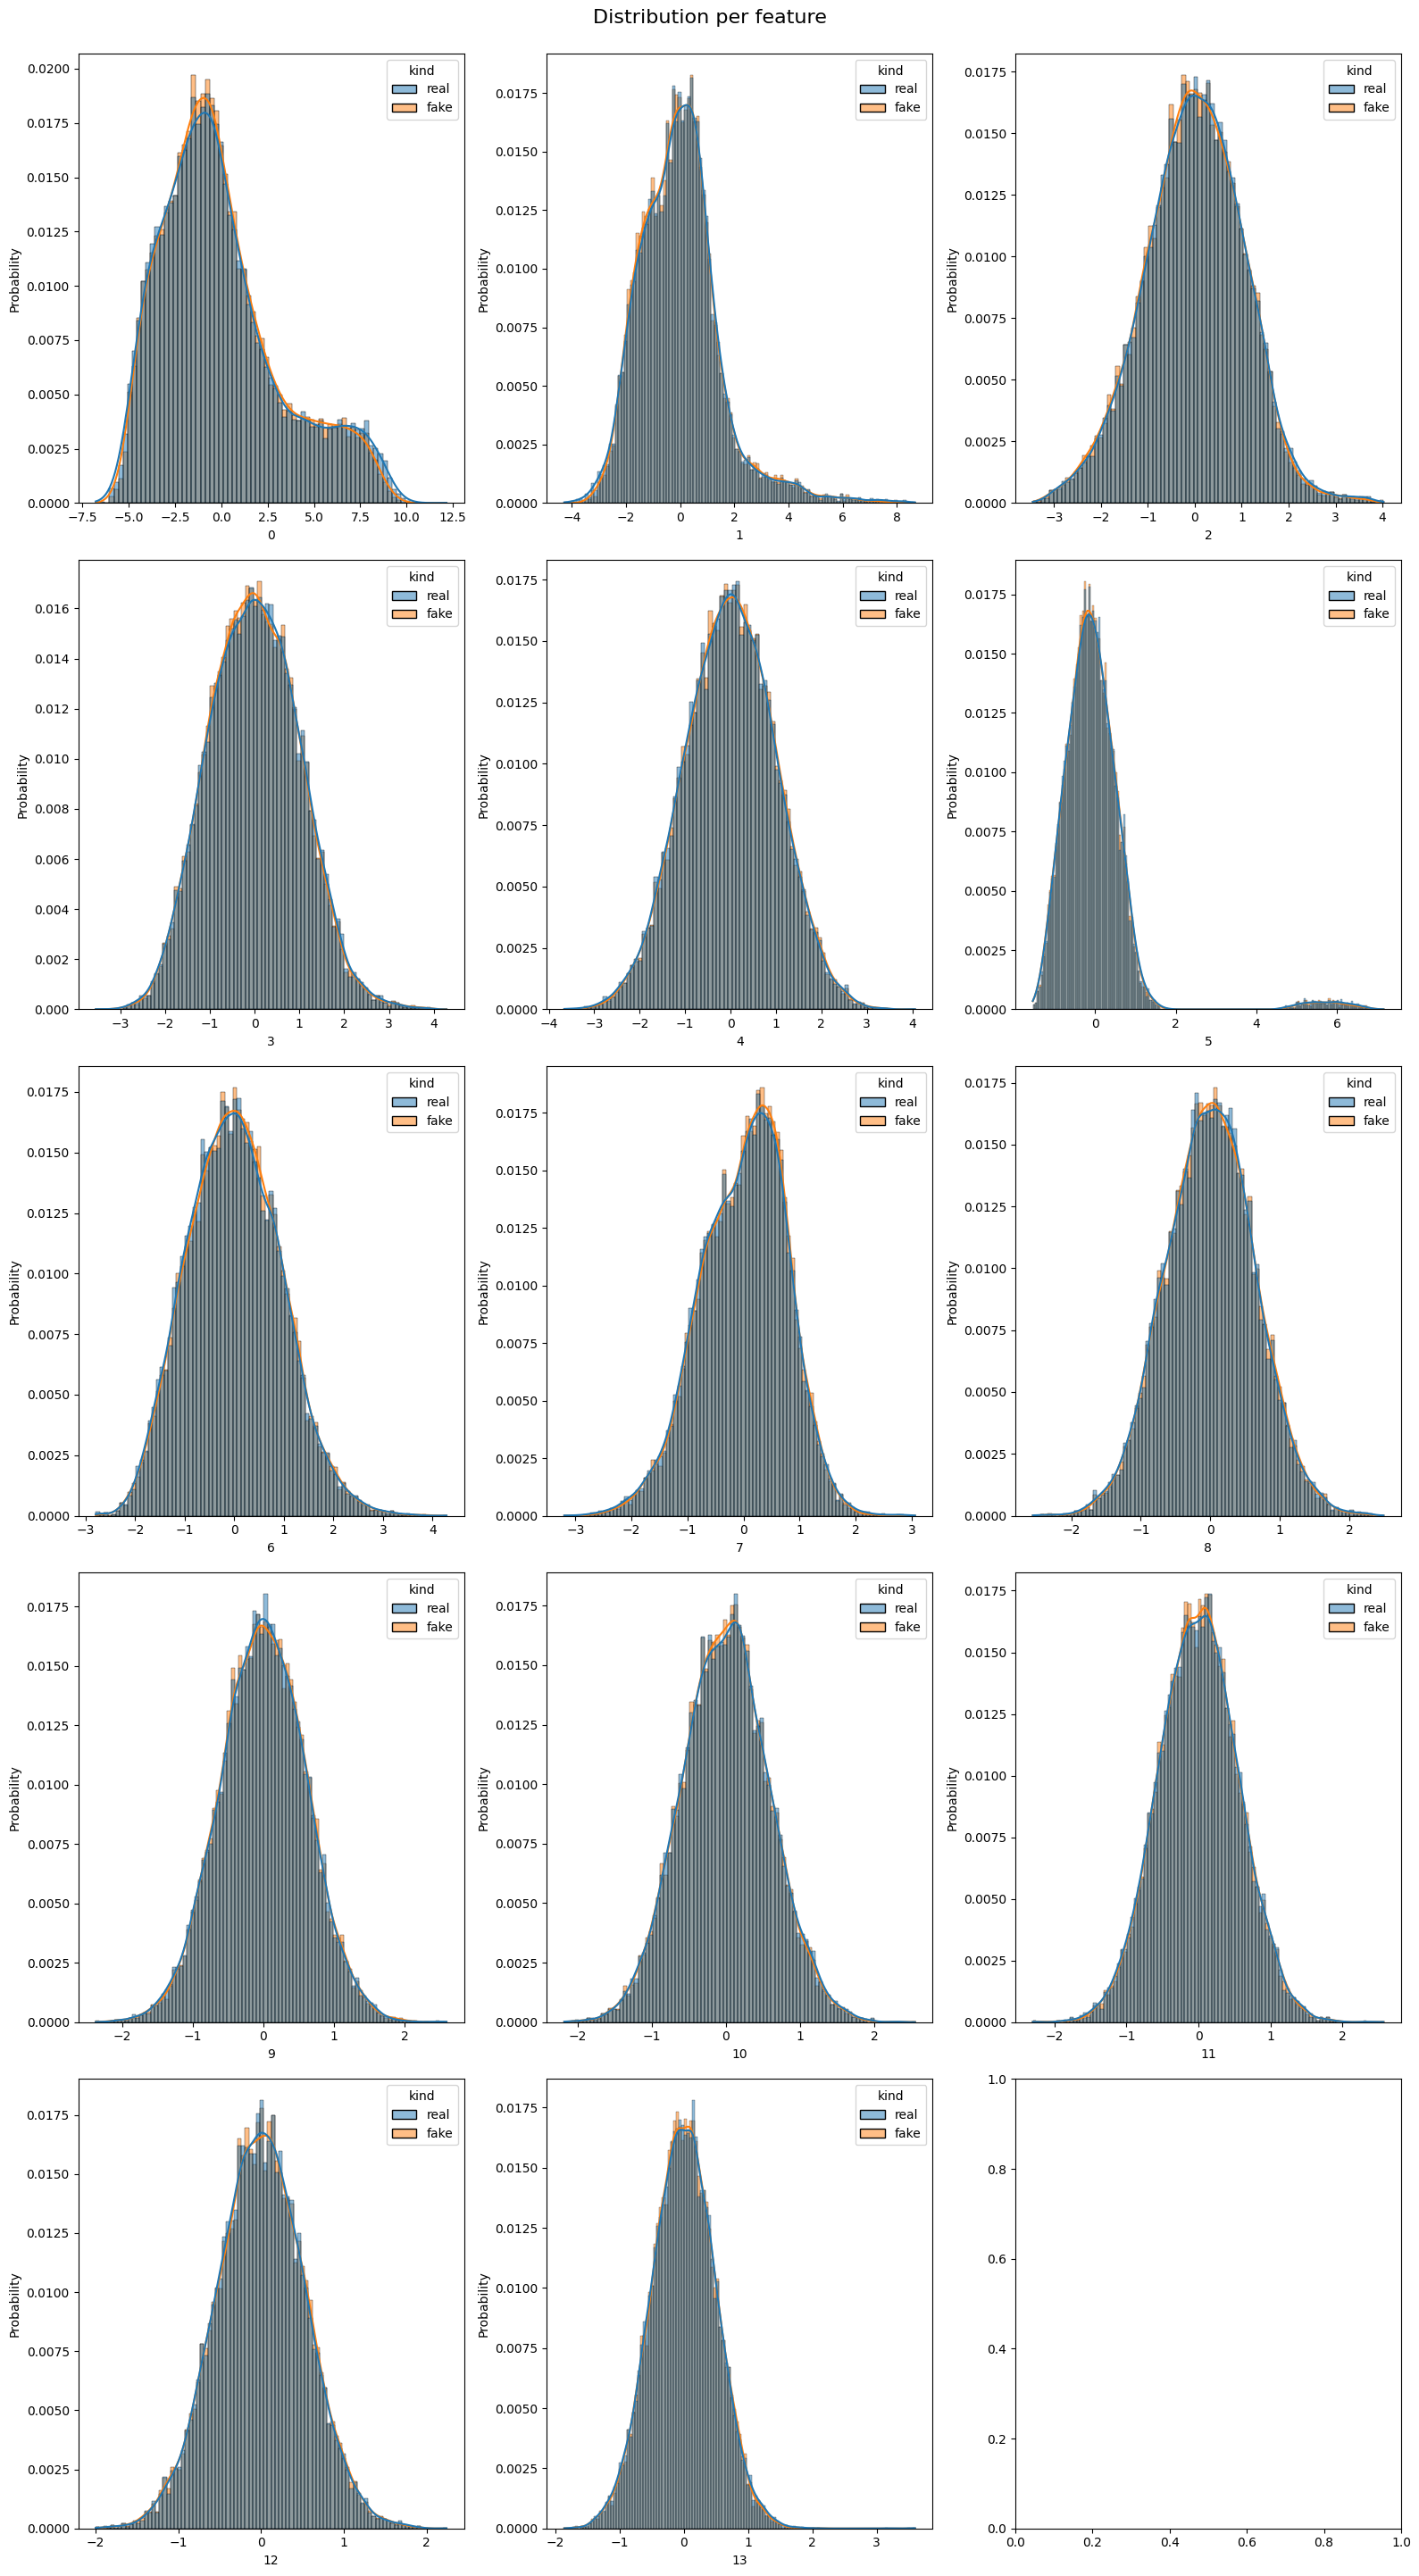

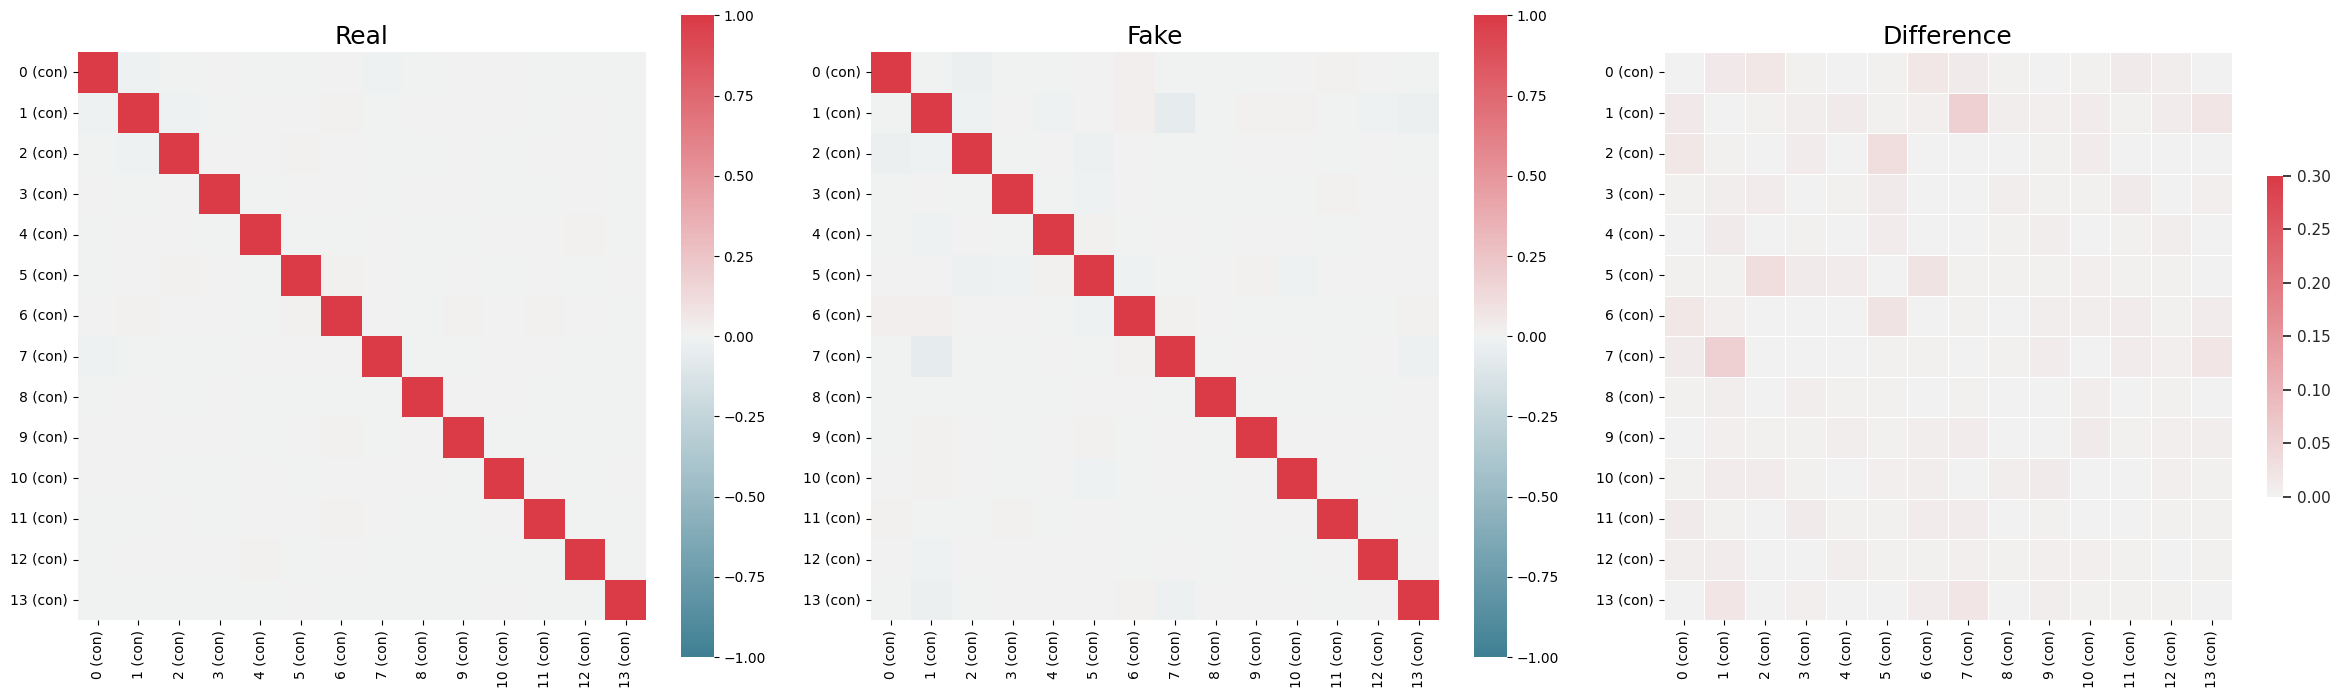

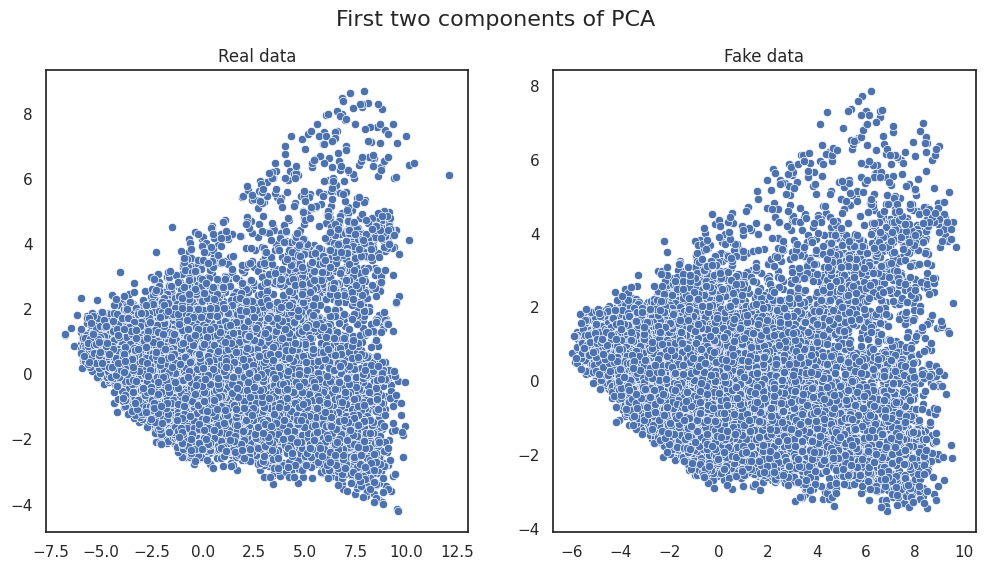

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from table_evaluator import TableEvaluator
import pandas as pd

# Normalize and scale data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop("RUL", axis=1))
gen_x_scaled = scaler.transform(gen_x)

# Perform PCA
pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df_scaled)
gen_x_pca = pca.transform(gen_x_scaled)

# Evaluate using TableEvaluator
table_evaluator = TableEvaluator(pd.DataFrame(df_pca), pd.DataFrame(gen_x_pca))
table_evaluator.visual_evaluation()

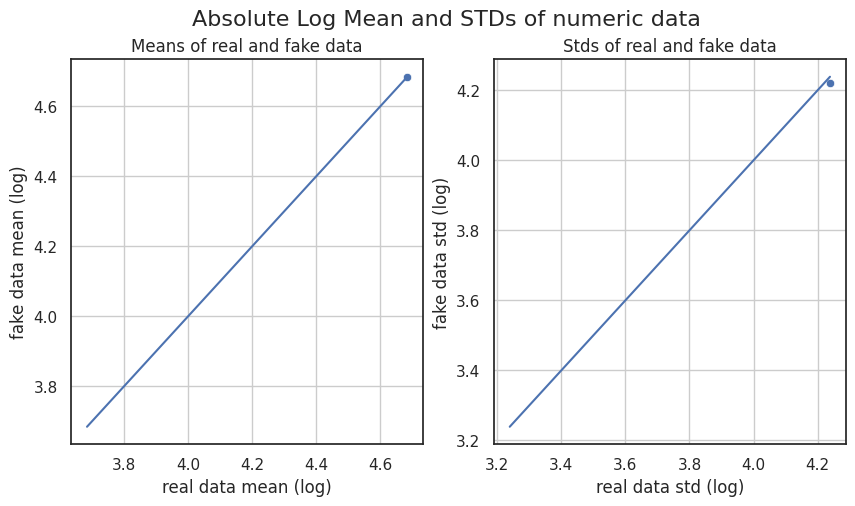

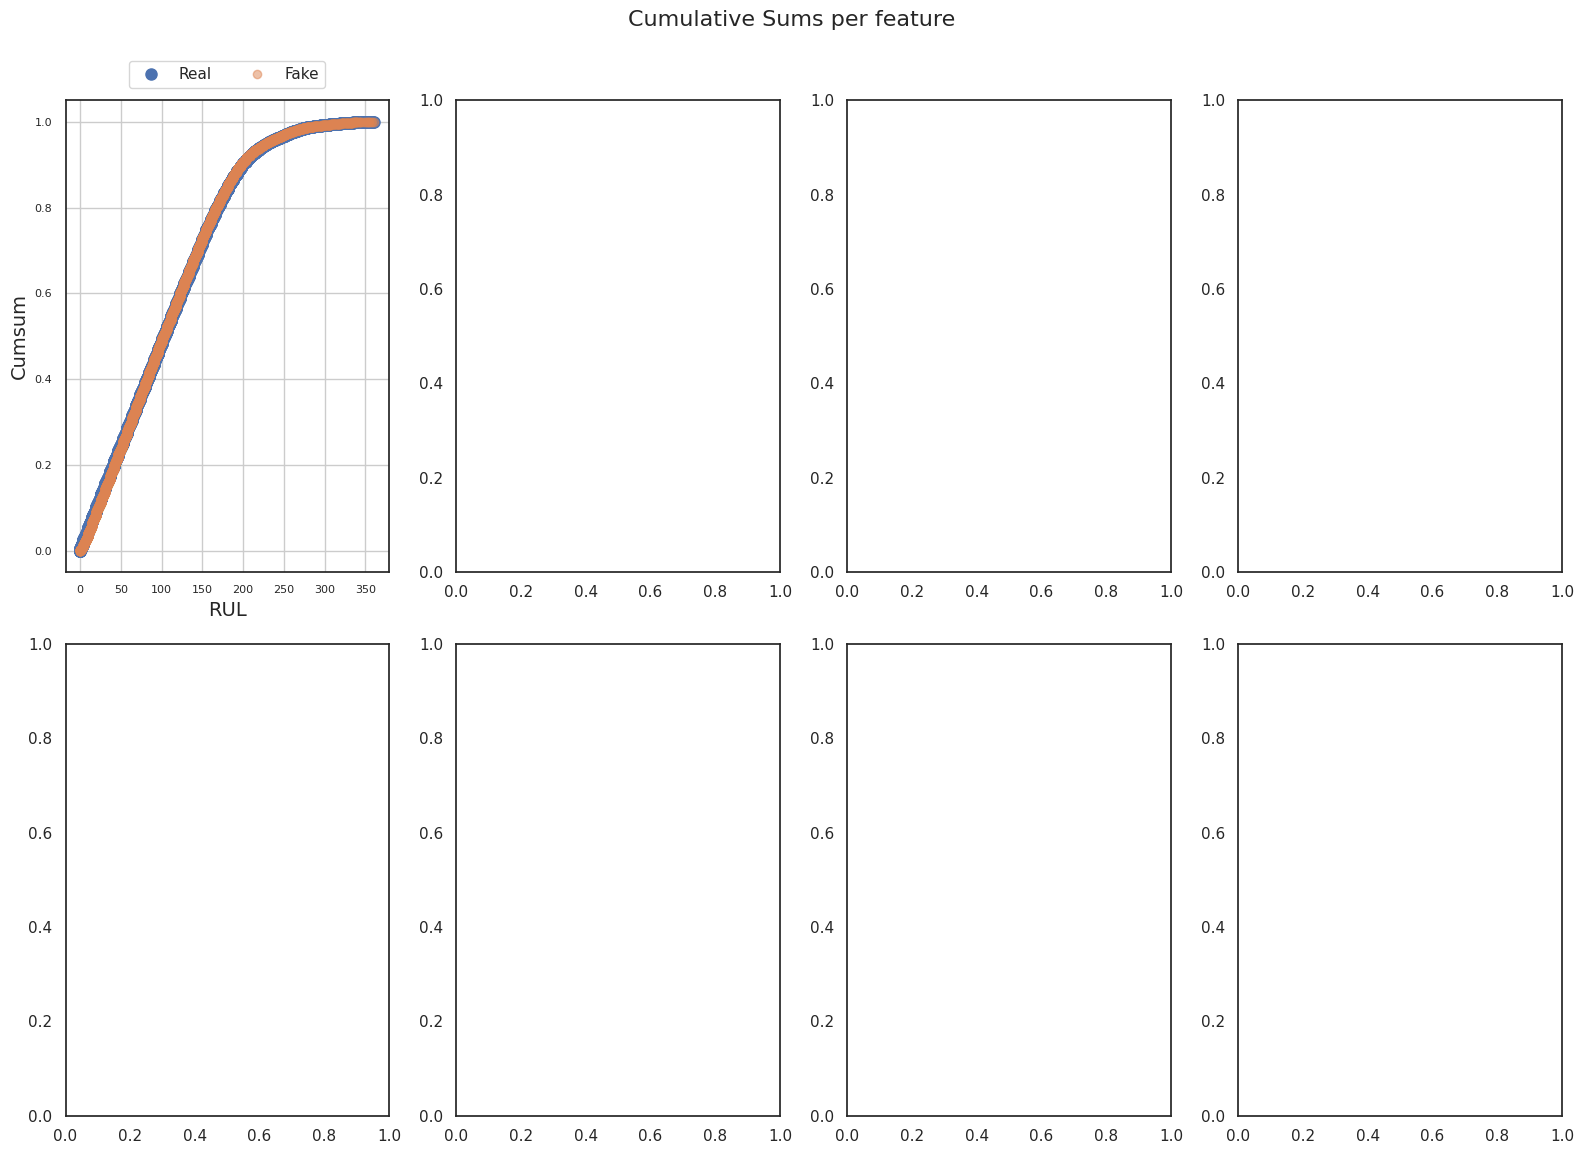

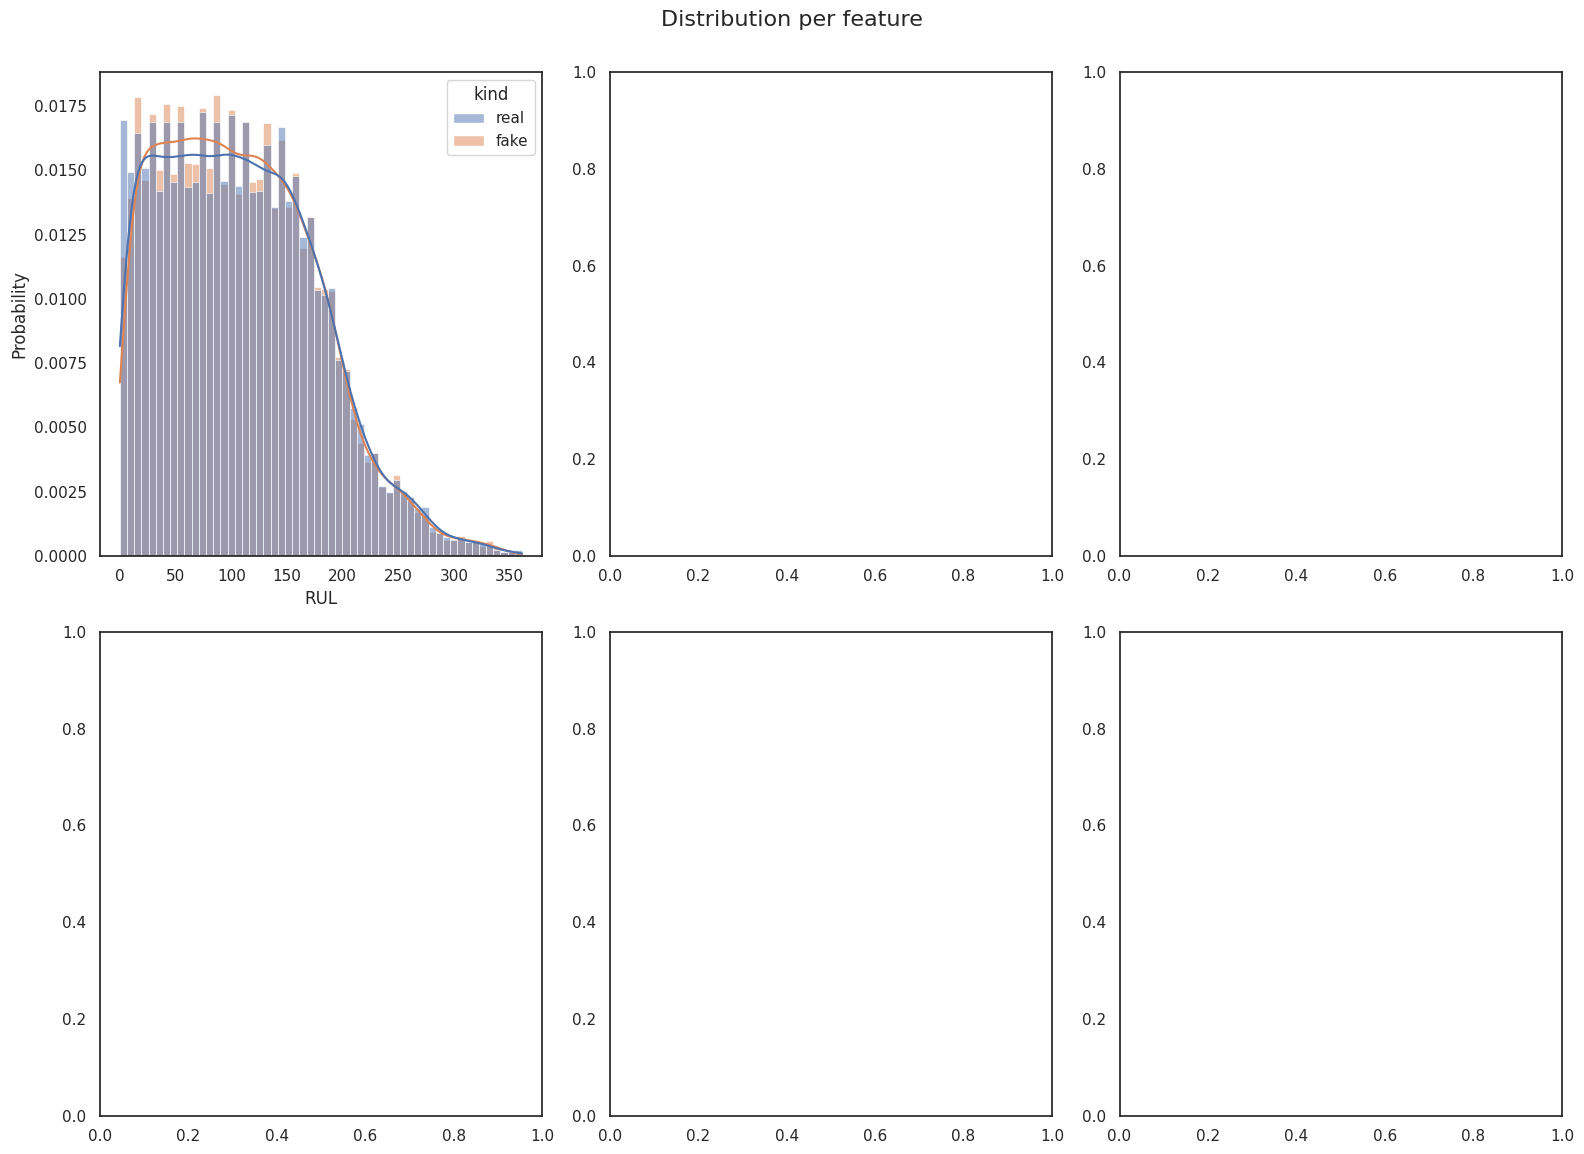

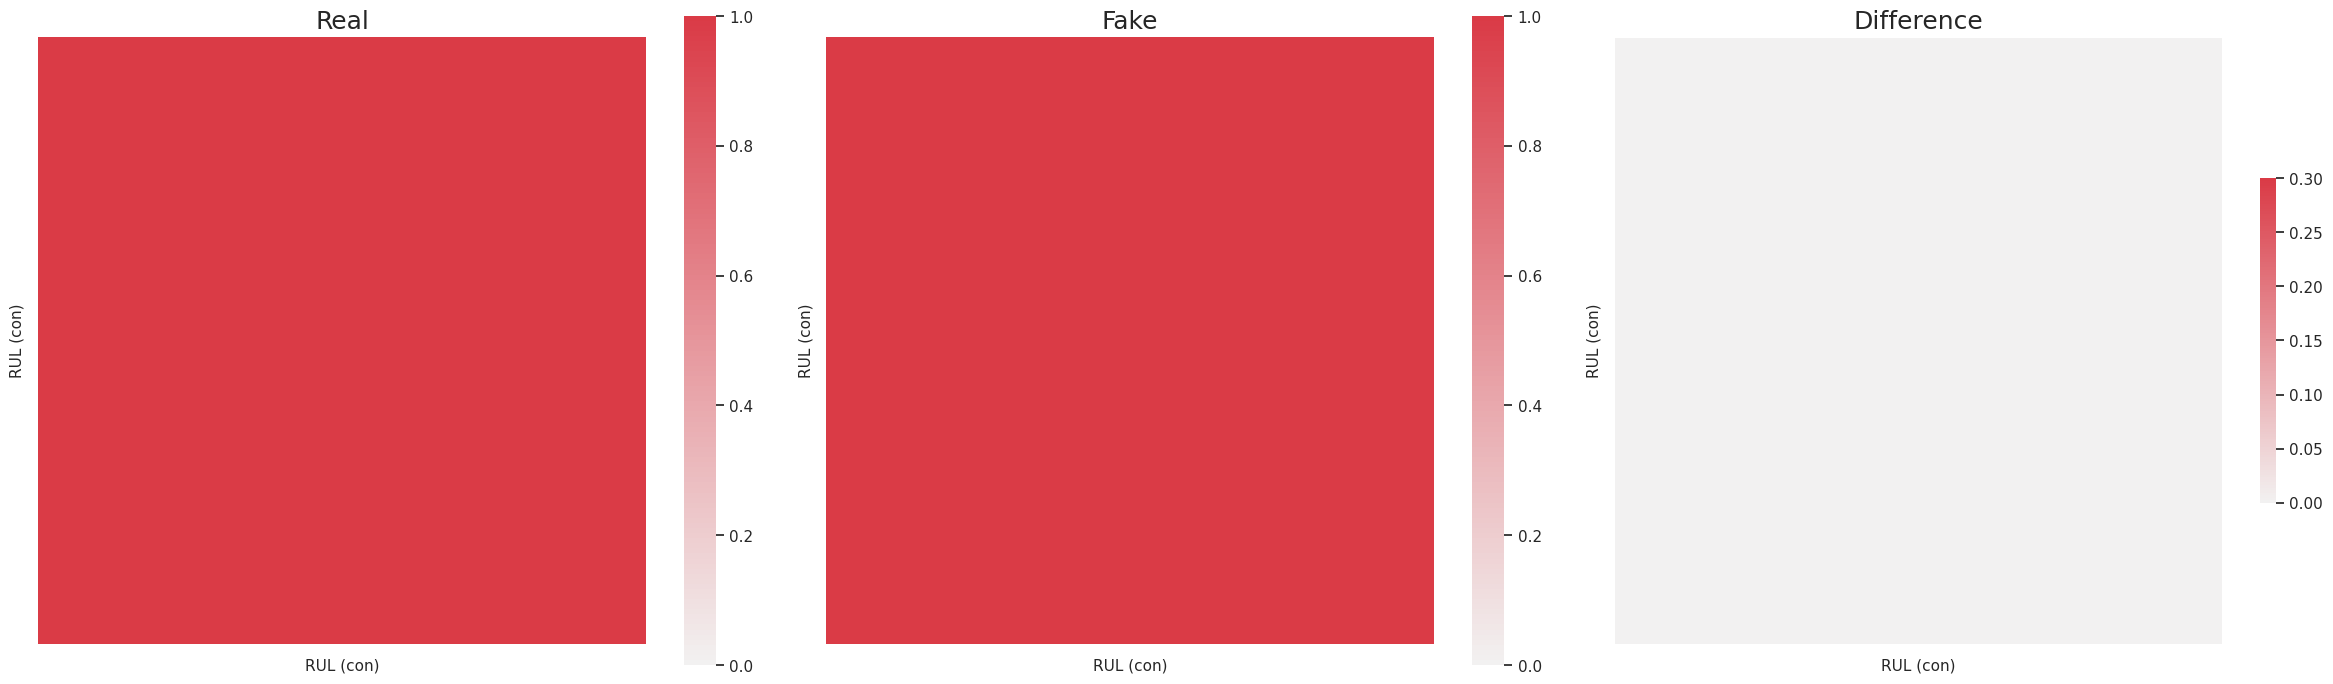

ValueError: n_components=2 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'

In [23]:
table_evaluator_target = TableEvaluator(pd.DataFrame(df["RUL"]), pd.DataFrame(gen_y, columns=["RUL"]))
table_evaluator_target.visual_evaluation()

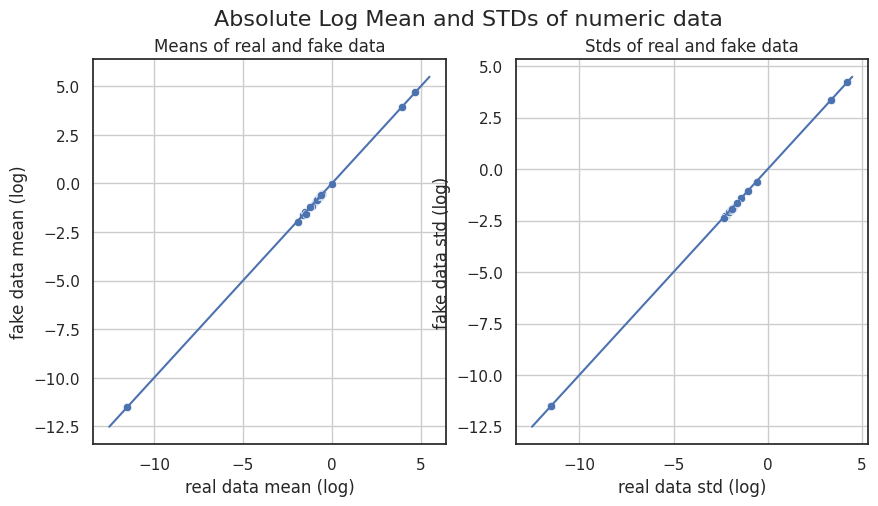

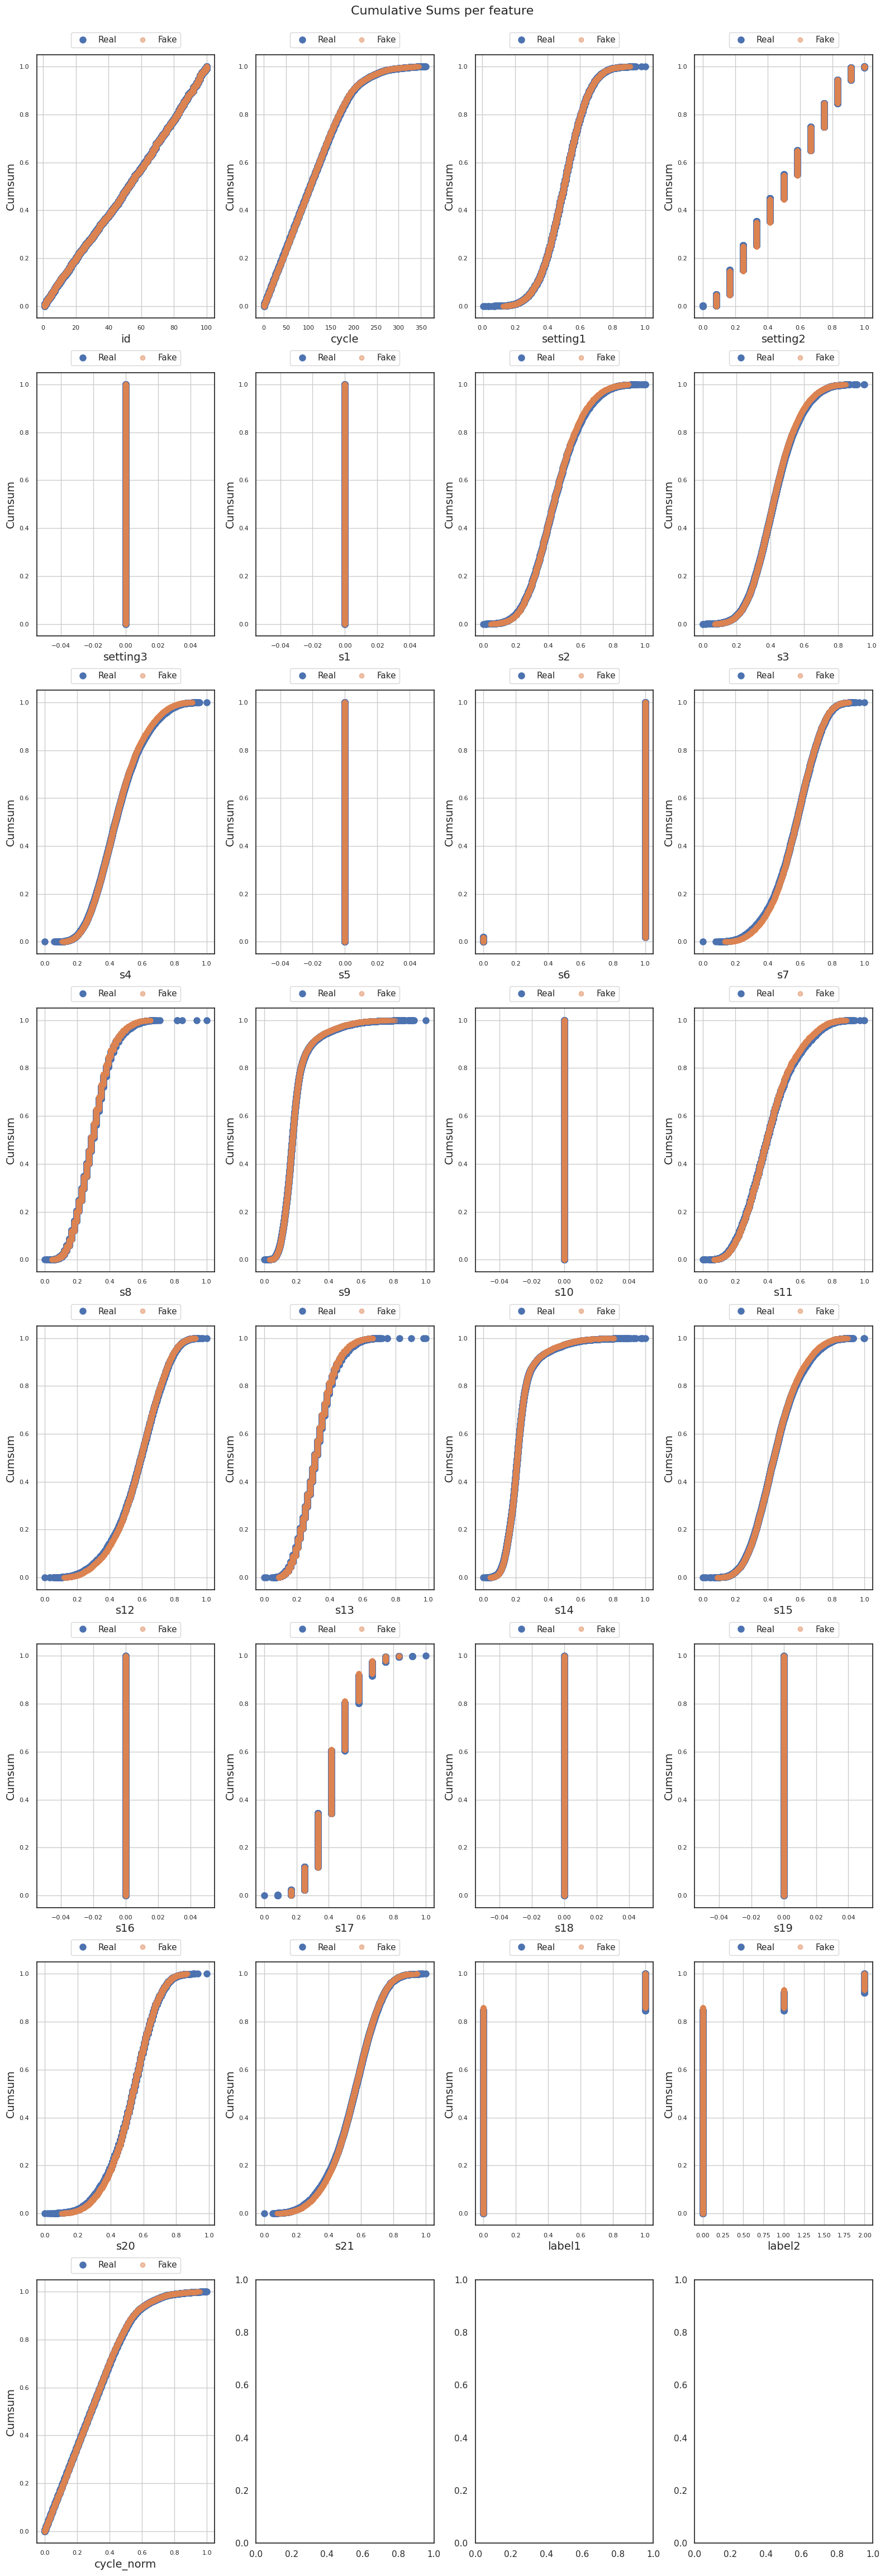

LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

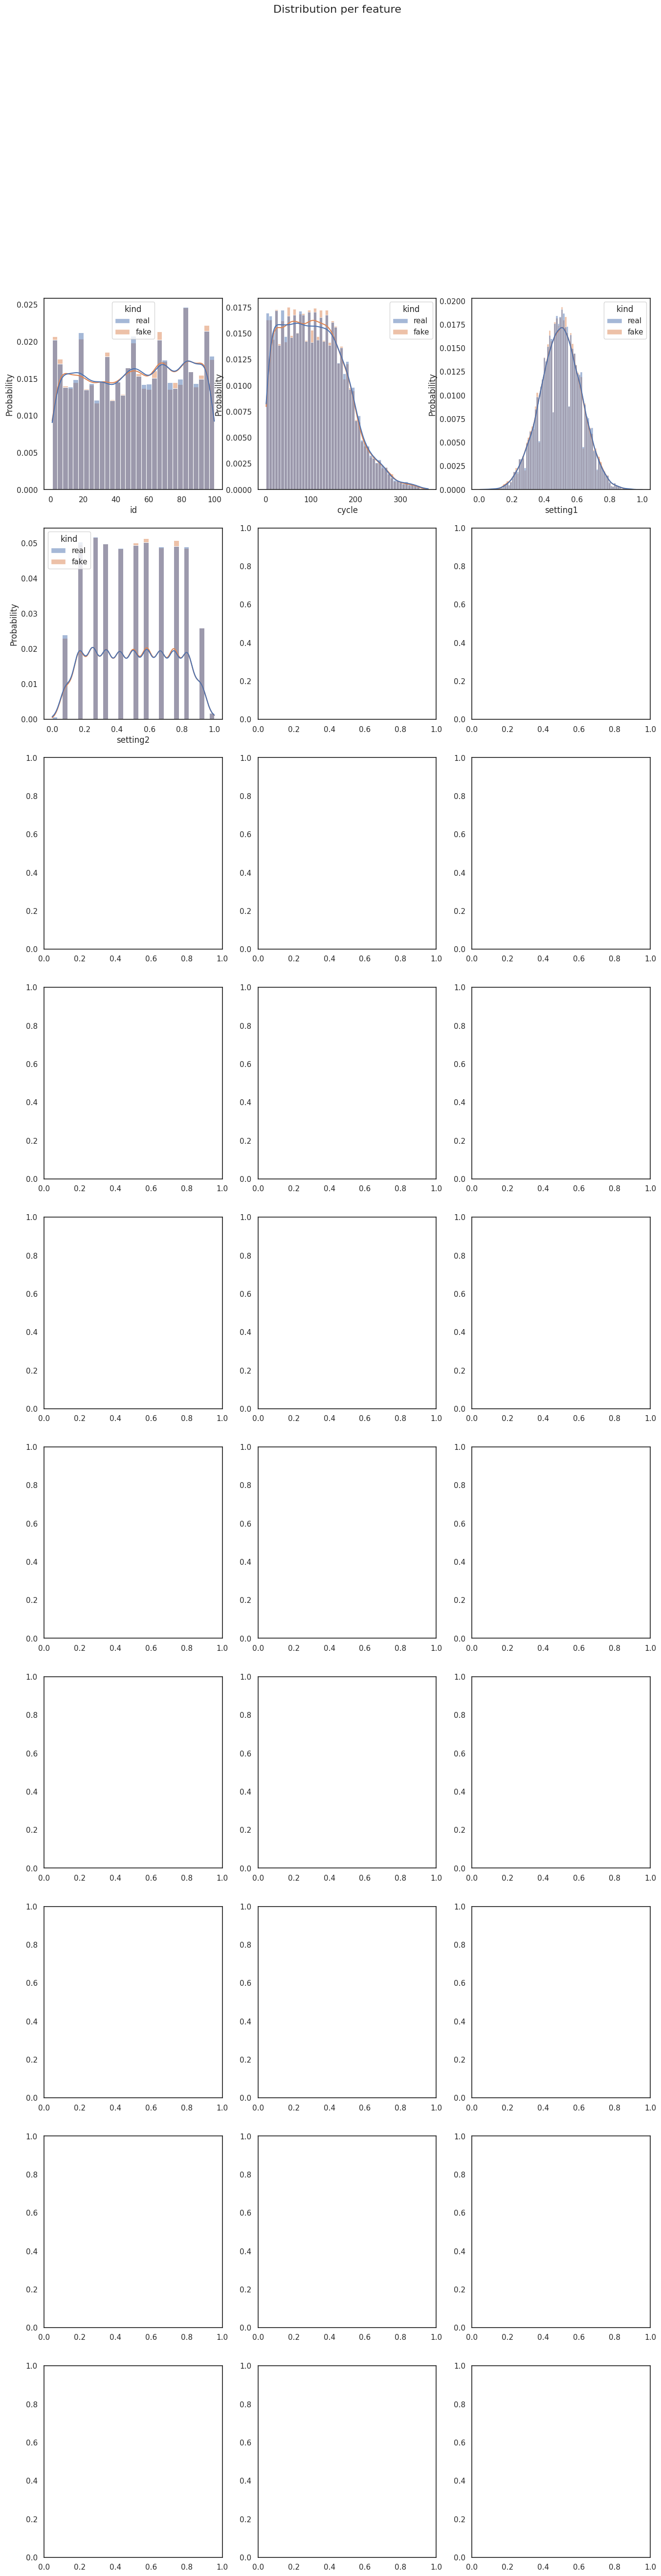

In [24]:
table_evaluator = TableEvaluator(df.drop(['RUL'],axis=1), gen_x)
table_evaluator.visual_evaluation()